In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
print("Libraries imported successfully!")

ModuleNotFoundError: No module named 'pandas'

In [ ]:
def explore_data(df):
  print("Missing values:")
  print(df.isna().sum())

  #Clean the data for dataset_fb_metrics.csv
  df = df.fillna({ 'Page total likes' : 'unknown', 'type' : 'unknown', 'Category' : 'unknown', 'Post Month' : 'unknown', 'Post Weekday' : 'unknown', 'Post Hour' : 'unknown','Paid' : 'unknown'})

  df[output_features] = df[output_features].fillna(0)
  df = df.drop_duplicates()

  print(df.head())
  return df

In [ ]:
#Task 1:
#Read the file
df = pd.read_csv('dataset_fb_metrics.csv')
print("DataFrame using read_csv:")
print(df)

#Assign input and output variables
input_features = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid']
output_features = ['Lifetime Post Total Reach','Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment','like','share','Total Interactions']

#Calling the function to do data cleaning
df = explore_data(df)

DataFrame using read_csv:
     Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0              139441   Photo         2          12             4          3   
1              139441  Status         2          12             3         10   
2              139441   Photo         3          12             3          3   
3              139441   Photo         2          12             2         10   
4              139441   Photo         2          12             2          3   
..                ...     ...       ...         ...           ...        ...   
495             85093   Photo         3           1             7          2   
496             81370   Photo         2           1             5          8   
497             81370   Photo         1           1             5          2   
498             81370   Photo         3           1             4         11   
499             81370   Photo         2           1             4          4   

     Paid  Li

In [ ]:
#Grouping: Average interactions by post type
group = df.groupby('Type')[['like', 'comment', 'share', 'Total Interactions']].mean()
print(group)

#Binning: Classify posts based on reach
bins = [0, 1000, 5000, 10000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Reach_Category'] = pd.cut(df['Lifetime Post Total Reach'], bins=bins, labels=labels)
print(df[['Lifetime Post Total Reach', 'Reach_Category']])

              like    comment      share  Total Interactions
Type                                                        
Link     73.318182   2.818182  12.909091           89.045455
Photo   182.183099   7.492958  26.903756          216.579812
Status  176.711111   8.911111  31.422222          217.044444
Video   231.428571  12.285714  52.142857          295.857143
     Lifetime Post Total Reach Reach_Category
0                         2752         Medium
1                        10460      Very High
2                         2413         Medium
3                        50128      Very High
4                         7244           High
..                         ...            ...
495                       4684         Medium
496                       3480         Medium
497                       3778         Medium
498                       4156         Medium
499                       4188         Medium

[500 rows x 2 columns]


In [ ]:
#Summary statistics for input_features
df[input_features].describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000
std,16272.813214,0.852675,3.307936,2.030701,4.368589
min,81370.000000,1.000000,1.000000,1.000000,1.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000


** Task 2**

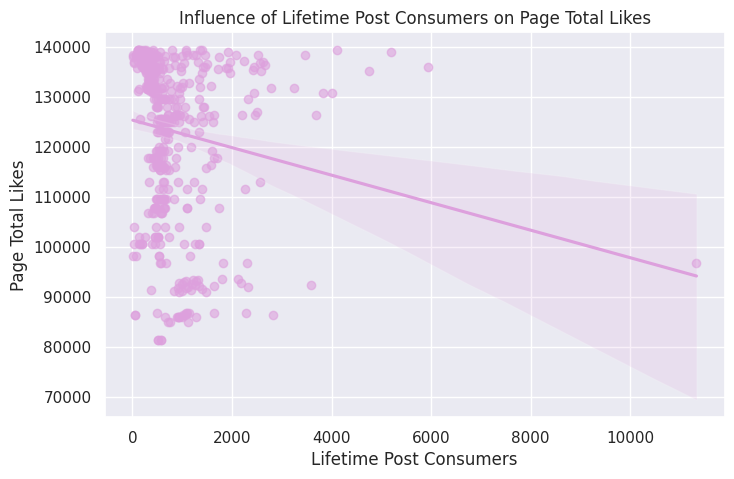

In [ ]:
# “Page total likes” influenced by “Lifetime Post Consumers”
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Lifetime Post Consumers', y='Page total likes', scatter_kws={"alpha": 0.6}, color = "plum")
plt.title("Influence of Lifetime Post Consumers on Page Total Likes")
plt.xlabel("Lifetime Post Consumers")
plt.ylabel("Page Total Likes")
plt.show()

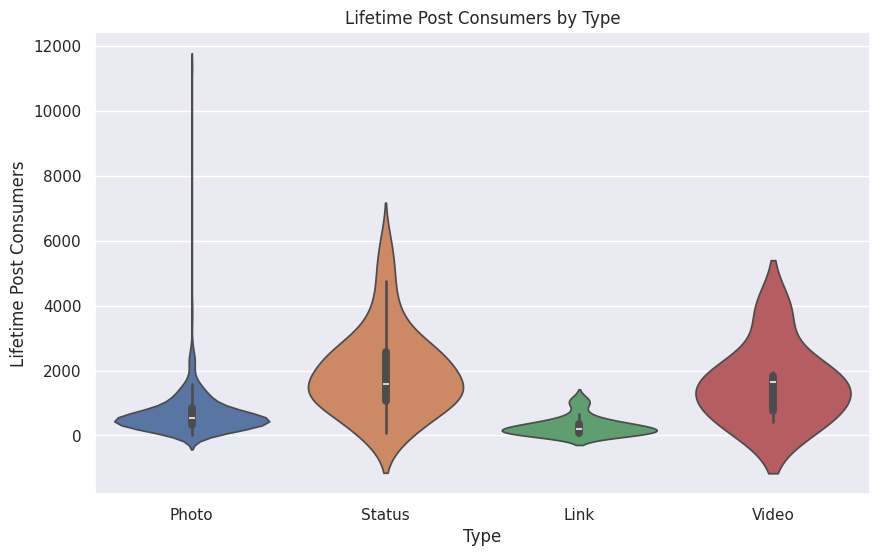

In [ ]:
#media posting “Type” has the best impact on “Lifetime Post Consumers”

plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Lifetime Post Consumers', data=df, hue = "Type")

plt.title('Lifetime Post Consumers by Type')
plt.xlabel('Type')
plt.ylabel('Lifetime Post Consumers')
plt.show()


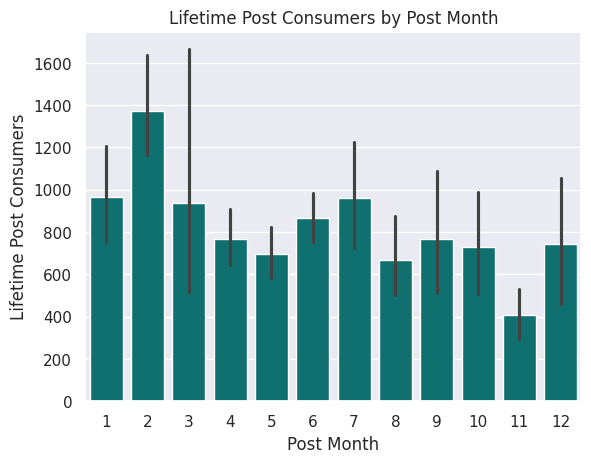

In [ ]:
#To find out the best "Month"s for posting

plt.title('Lifetime Post Consumers by Post Month')
plt.xlabel('Post Month')
plt.ylabel('Lifetime Post Consumers')
sns.barplot(x='Post Month', y='Lifetime Post Consumers', data=df, estimator = 'mean', color = 'teal')
plt.show()


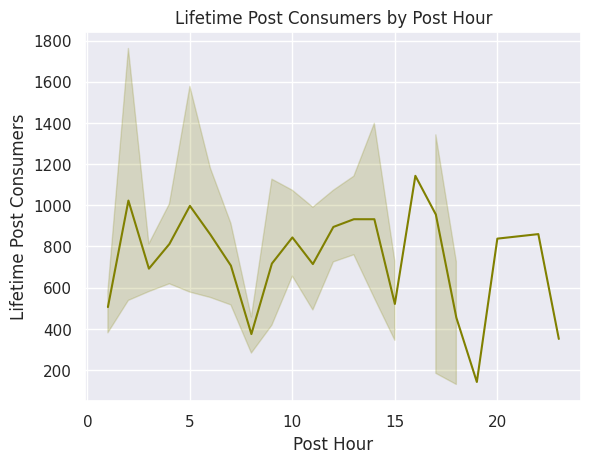

In [ ]:
#To find out the best “Hour”s for posting

plt.title('Lifetime Post Consumers by Post Hour')
plt.xlabel('Post Hour')
plt.ylabel('Lifetime Post Consumers')
sns.lineplot(x='Post Hour', y='Lifetime Post Consumers', data=df, color = 'olive')

plt.show()


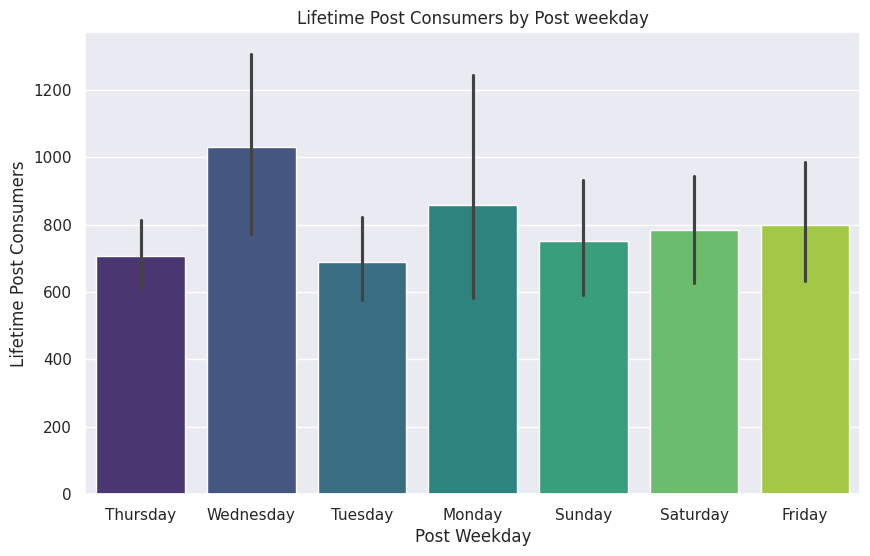

In [ ]:
#To find out the most popular “weekday” for posting

week_days = {1: 'Monday', 2: 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday', 7 : 'Sunday'}
ordereddays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekdays'] = df['Post Weekday'].map(week_days)
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekdays', y='Lifetime Post Consumers', data=df, estimator = 'mean', hue='Weekdays', palette='viridis')
plt.title('Lifetime Post Consumers by Post weekday')
plt.xlabel('Post Weekday')
plt.ylabel('Lifetime Post Consumers')

plt.show()

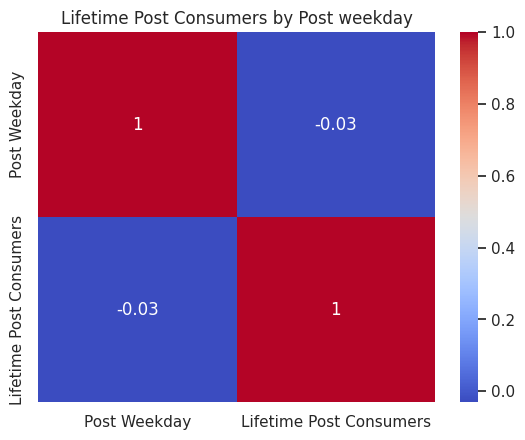

In [ ]:
#To find out the most popular “weekday” for posting

plt.title('Lifetime Post Consumers by Post weekday')
plt.xlabel('Post Weekday')
plt.ylabel('Lifetime Post Consumers')

corr = df[['Post Weekday', 'Lifetime Post Consumers']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

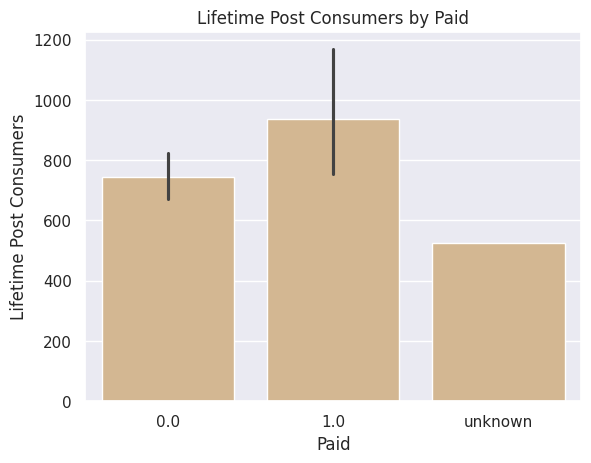

In [ ]:
#To find out the influence of “Paid” on “Lifetime Post Consumers

plt.title('Lifetime Post Consumers by Paid')
plt.xlabel('Paid')
plt.ylabel('Lifetime Post Consumers')
sns.barplot(x='Paid', y='Lifetime Post Consumers', data=df, estimator = 'mean', color = 'burlywood')

plt.show()

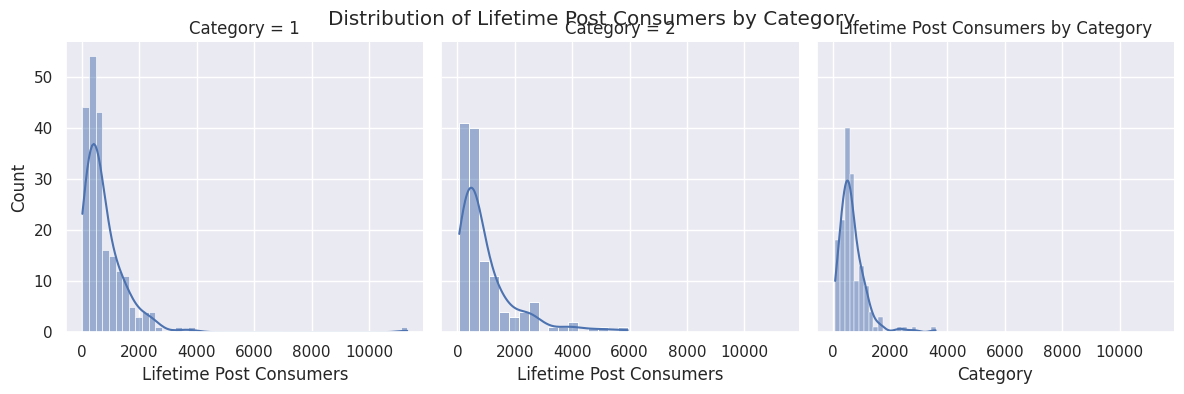

In [ ]:
# To find out the “Category” affect “Lifetime Post Consumers”

g = sns.FacetGrid(df, col='Category', col_wrap=3, height=4)
g.map(sns.histplot, 'Lifetime Post Consumers', kde=True)
plt.suptitle('Distribution of Lifetime Post Consumers by Category')


plt.title('Lifetime Post Consumers by Category')
plt.xlabel('Category')
plt.ylabel('Lifetime Post Consumers')
plt.show()

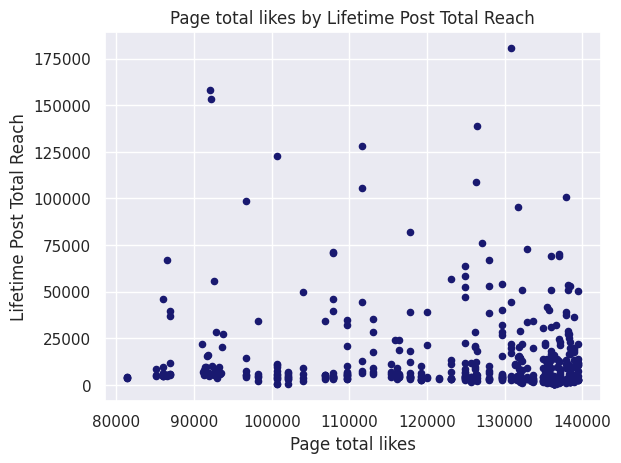

In [ ]:
# Choose ONE (1) more output feature apart from “Lifetime Post Consumers” to analyse

#Total page likes by Lifetime Post Total Reach

df.plot(kind='scatter', x= 'Page total likes', y='Lifetime Post Total Reach', color = "midnightblue")
plt.title('Page total likes by Lifetime Post Total Reach')
plt.xlabel('Page total likes')
plt.ylabel('Lifetime Post Total Reach')

plt.show()

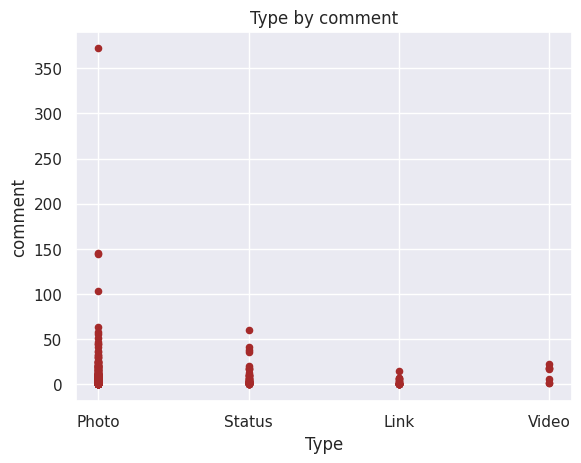

In [ ]:
# Type by comment

plt.show()
df.plot(kind='scatter', x= 'Type', y='comment', color = "brown")
plt.title('Type by comment')
plt.xlabel('Type')
plt.ylabel('comment')

plt.show()

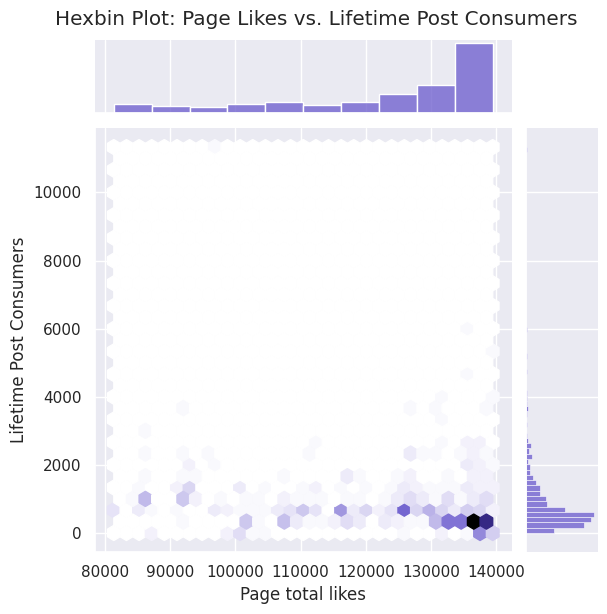

In [ ]:
#Page likes vs Post Consumers

sns.jointplot(data = df, x="Page total likes", y="Lifetime Post Consumers", kind="hex", color = "slateblue")
plt.suptitle('Hexbin Plot: Page Likes vs. Lifetime Post Consumers', y=1.02)
plt.show()

In [ ]:
#Syntax
from sklearn.tree import DecisionTreeRegressor

# Create the model
model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
print(f"Length of the Lifetime Post Consumers:",len(df['Lifetime Post Consumers'].unique()))

Length of the Lifetime Post Consumers: 422


<ipython-input-26-cd5ecfed0e02>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Type', 'Paid']] = x[['Type', 'Paid']].apply(lambda col: col.astype('category').cat.codes)


[ 746.06756757  746.06756757  420.03658537  420.03658537 1178.35
 1178.35        746.06756757  420.03658537  746.06756757  420.03658537
  746.06756757  420.03658537  420.03658537  420.03658537  746.06756757
  420.03658537  746.06756757  746.06756757 1548.05555556  420.03658537
  746.06756757  746.06756757  746.06756757 1178.35        420.03658537
  746.06756757  420.03658537  746.06756757  420.03658537  420.03658537
  420.03658537  746.06756757  420.03658537  746.06756757  746.06756757
  420.03658537 2210.77272727  420.03658537  746.06756757  746.06756757
  746.06756757  746.06756757 1178.35        420.03658537  746.06756757
  746.06756757  746.06756757 2210.77272727  746.06756757  420.03658537
  420.03658537  420.03658537 4754.          746.06756757 1178.35
  420.03658537 1548.05555556  746.06756757  420.03658537  746.06756757
  746.06756757  420.03658537  746.06756757  746.06756757  746.06756757
  746.06756757  746.06756757  746.06756757  746.06756757  420.03658537
  746.06756757  74

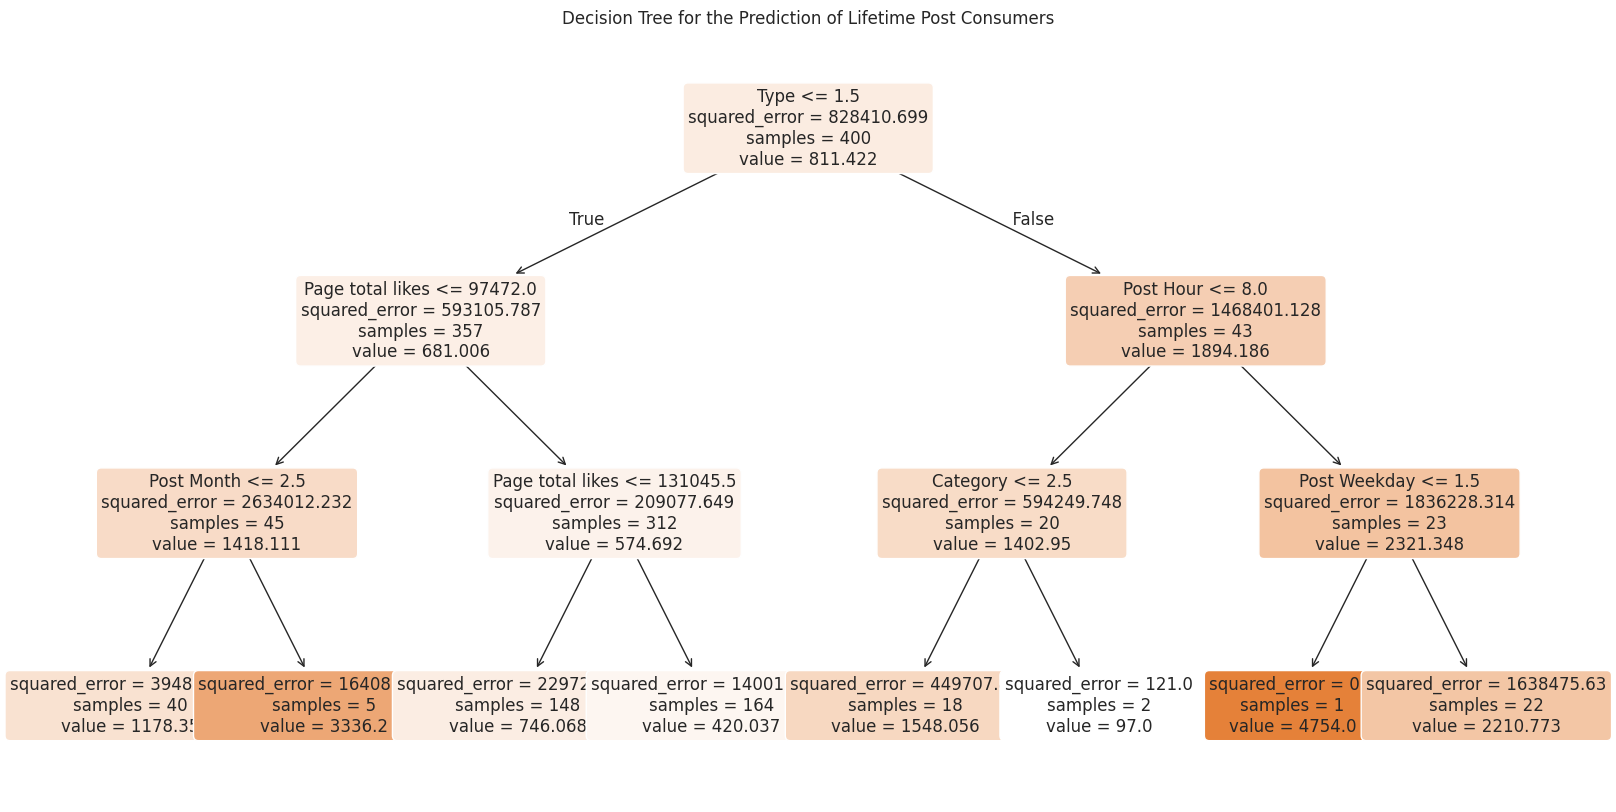

In [ ]:
# To Create and visualize a DECISION TREE model using the input features to predict “Lifetime Post Consumers”

#Copying the cleaned df data into df1
df1 = df.copy()

input_features = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid']

#Input and output features
x = df1[input_features]
y = df1['Lifetime Post Consumers']

#convert to numeric type so that decision tree regressor can be done
x[['Type', 'Paid']] = x[['Type', 'Paid']].apply(lambda col: col.astype('category').cat.codes)

#declaring test and train data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 1)

#create the model
model =DecisionTreeRegressor(max_depth = 3,random_state = 1)

#train the model
model.fit(xtrain,ytrain)

#make predictions
ypred = model.predict(xtest)
print(ypred)

#visualizing the decison tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=input_features, filled=True, rounded=True, fontsize = 12)
plt.title('Decision Tree for the Prediction of Lifetime Post Consumers')
plt.show()